# <u>CSC2034 Contemporary Topics: Data Science</u>

## Imports 

In [37]:
import sklearn as sk
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<br>

# Task 1

For this task, I performed Data Analytics and Visualization on the <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wine datasets. The analytics include aggregations, summary statistics, and plots to explore the data and its features.

## Task 1.a

Before plotting the data, I retrieved the CSV data, and stored it in `pandas` DataFrames. After loading, I performed `quality` descriptions for both sets.

To visualize and have a deeper understanding of the feature `quality`, I made a `countplot` to analyze the features' distribution across the samples.

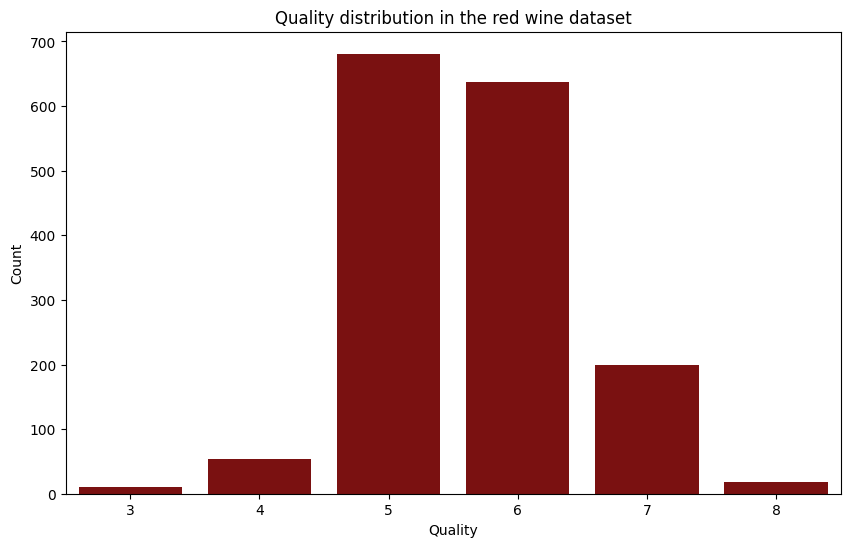

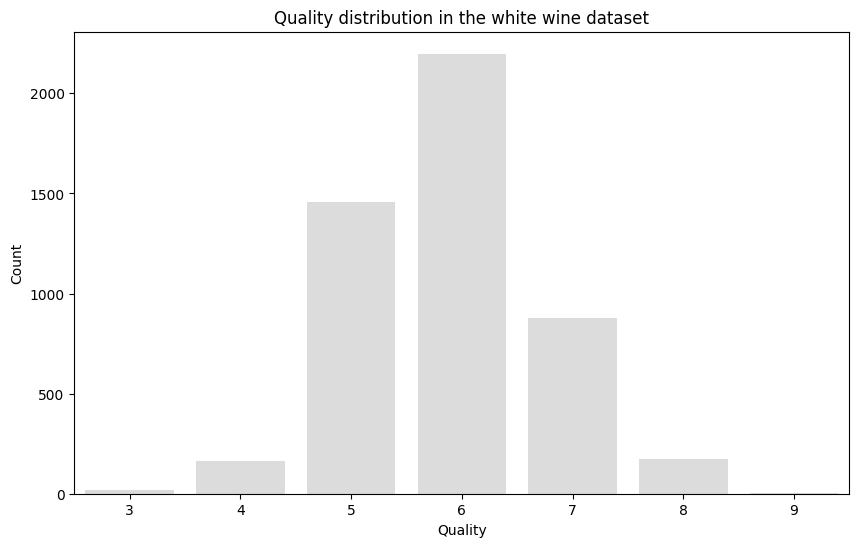

In [18]:
# Plotting the distribution of quality in the red wine dataset
plt.figure(figsize = (10, 6))
sns.countplot(x ="quality",data=red_wine, color="darkred")
plt.title("Quality distribution in the red wine dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

# Plotting the distribution of quality in the white wine dataset
plt.figure(figsize = (10, 6))
sns.countplot(x ="quality",data=white_wine, color="gainsboro")
plt.title("Quality distribution in the white wine dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

<br>

## Task 1.b

After analyzing `quality`, I analyzed the feature `alcohol`. Before performing any computations, I discretized the alcohol values from both sets into a three-valued `alcohol_cat` variable. Each sample was assigned one of three categories: `low`, `mid`, or `high`:

In [19]:
# Discretize alcohol contents by creating a new column 'alcohol_cat' in the red wine dataset
red_wine['alcohol_cat'] = ['low' if x < red_wine['alcohol'].mean()-red_wine['alcohol'].std() 
                           else 'mid' if red_wine['alcohol'].mean()-red_wine['alcohol'].std() < x < red_wine['alcohol'].mean()+red_wine['alcohol'].std() 
                           else 'high' for x in red_wine['alcohol']]

# Discretize alcohol contents by creating a new column 'alcohol_cat' in the white wine dataset
white_wine['alcohol_cat'] = ['low' if x < white_wine['alcohol'].mean()-white_wine['alcohol'].std() 
                           else 'mid' if white_wine['alcohol'].mean()-white_wine['alcohol'].std() < x < white_wine['alcohol'].mean()+white_wine['alcohol'].std() 
                           else 'high' for x in white_wine['alcohol']]

print("🔴Red Wine🔴:")
display(red_wine["alcohol_cat"].value_counts())
print("\n⚪White Wine⚪:")
display(white_wine["alcohol_cat"].value_counts())

🔴Red Wine🔴:


alcohol_cat
mid     1125
high     280
low      194
Name: count, dtype: int64


⚪White Wine⚪:


alcohol_cat
mid     3121
high     932
low      845
Name: count, dtype: int64

<br>

## Task 1.c

Now that `alcohol` has been discretized into `alcohol_cat`, I iterated through the categories to perform `quality` descriptions and create plots, similar to **Task 1.a**.

🔴Red Wine's Alcohol Categories🔴:

🔴Category🔴: mid


count    1125.000000
mean        5.526222
std         0.746568
min         3.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

🔴Category🔴: low


count    194.000000
mean       5.247423
std        0.611308
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: quality, dtype: float64

🔴Category🔴: high


count    280.000000
mean       6.346429
std        0.755853
min        4.000000
25%        6.000000
50%        6.000000
75%        7.000000
max        8.000000
Name: quality, dtype: float64


⚪White Wine's Alcohol Categories⚪:

⚪Category⚪: low


count    845.000000
mean       5.547929
std        0.814057
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

⚪Category⚪: mid


count    3121.000000
mean        5.766741
std         0.821620
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

⚪Category⚪: high


count    932.000000
mean       6.549356
std        0.819165
min        3.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: quality, dtype: float64

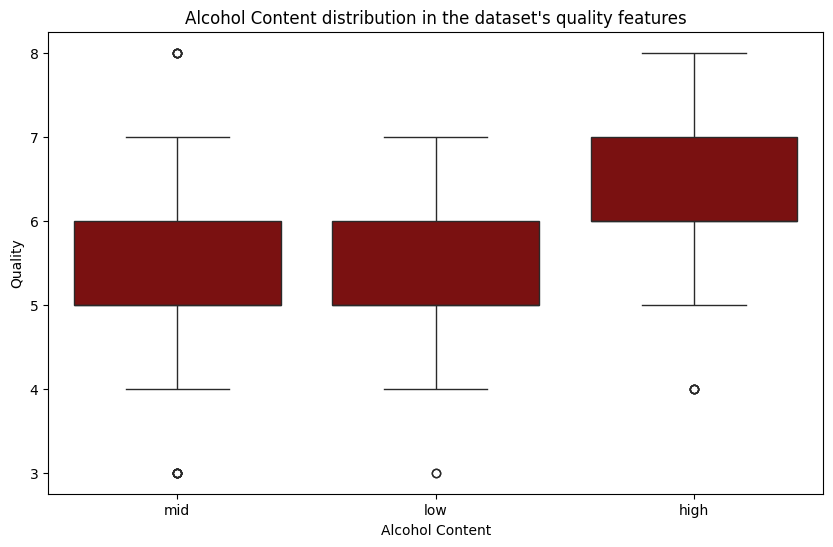

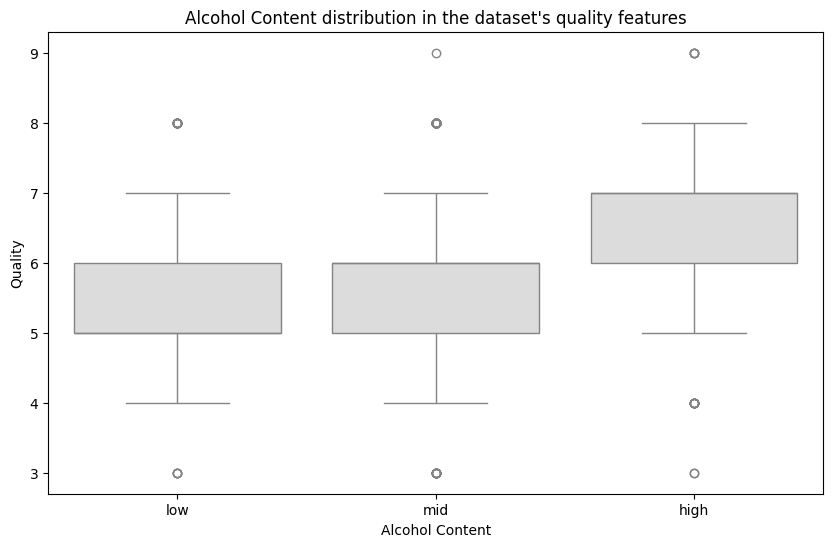

In [20]:
# Describe the quality of red wines based on alcohol categories
print("🔴Red Wine's Alcohol Categories🔴:\n")

for category in red_wine["alcohol_cat"].unique():
    red_wine_subset = red_wine[red_wine["alcohol_cat"] == category]
    print(f"🔴Category🔴: {category}")
    display(red_wine_subset["quality"].describe())
    
# Describe the quality of white wines based on alcohol categories
print("\n⚪White Wine's Alcohol Categories⚪:\n")

# Loop through each unique alcohol category in white wine and display the quality statistics
for category in white_wine["alcohol_cat"].unique():
    white_wine_subset = white_wine[white_wine["alcohol_cat"] == category]
    print(f"⚪Category⚪: {category}")
    display(white_wine_subset["quality"].describe())
    

# Plotting the distribution of alcohol content in red wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=red_wine["alcohol_cat"], y=red_wine["quality"], color="darkred")
plt.title("Alcohol Content distribution in the dataset's quality features")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()
plt.close()

# Plotting the distribution of alcohol content in white wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=white_wine["alcohol_cat"], y=white_wine["quality"], color="gainsboro")
plt.title("Alcohol Content distribution in the dataset's quality features")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()
plt.close()

<br>

## Task 1.d

For this task, I analyzed `residual_sugar` and discretized it with a binary categorical variable `isSweet`, similar to **Task 1.b** with `alcohol` and `alcohol_cat`.

To achieve an even split of the samples when categorizing into `isSweet`, I determined the median of each set and used it as the threshold. So that, samples below the median classify as `dry`, and those at or above the median are `sweet`.


Median of Red Wine samples' residual sugar:
2.2


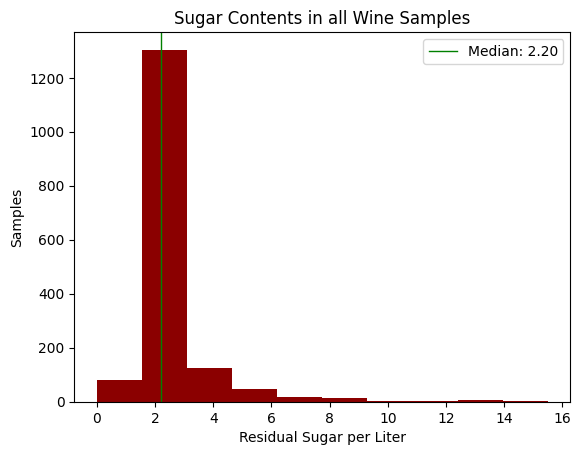

Median of White Wine samples' residual sugar:
5.2


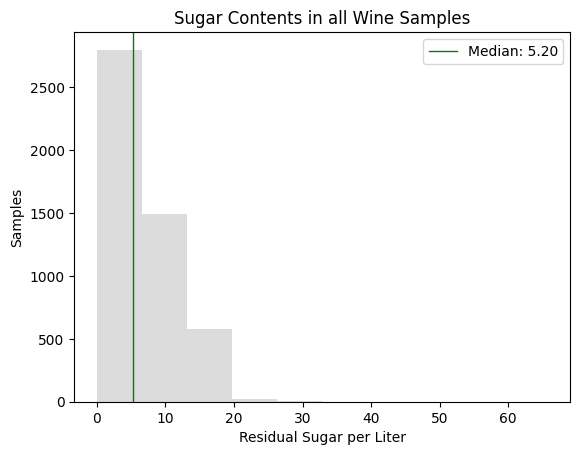

🔴Red Wine's Residual Sugar Statistics🔴:


count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64


⚪White Wine's Residual Sugar Statistics⚪:


count    4898.000000
mean        6.391415
std         5.072058
min         0.600000
25%         1.700000
50%         5.200000
75%         9.900000
max        65.800000
Name: residual sugar, dtype: float64

In [21]:
# Determine the median for the residual sugar in red and white wines
red_wine_sugar_threshold = red_wine['residual sugar'].median()
white_wine_sugar_threshold = white_wine['residual sugar'].median()

# Display the median of the red wine samples' residual sugar
print("Median of Red Wine samples' residual sugar:")
print(red_wine['residual sugar'].median())

# Create a histogram
plt.hist(red_wine["residual sugar"], bins=10, range=[0, red_wine['residual sugar'].max()], color='darkred')

# Add a vertical line for the median
plt.axvline(np.median(red_wine["residual sugar"]), color='green', linestyle='solid', linewidth=1, label=f'Median: {np.median(red_wine["residual sugar"]):.2f}')

plt.xlabel('Residual Sugar per Liter')
plt.ylabel('Samples')
plt.title('Sugar Contents in all Wine Samples')
plt.legend()
plt.show()

# Display the median of the white wine samples' residual sugar
print("Median of White Wine samples' residual sugar:")
print(white_wine['residual sugar'].median())

# Create a histogram
plt.hist(white_wine["residual sugar"], bins=10, range=[0, white_wine['residual sugar'].max()], color='gainsboro')

# Add a vertical line for the median
plt.axvline(np.median(white_wine["residual sugar"]), color='green', linestyle='solid', linewidth=1, label=f'Median: {np.median(white_wine["residual sugar"]):.2f}')

plt.xlabel('Residual Sugar per Liter')
plt.ylabel('Samples')
plt.title('Sugar Contents in all Wine Samples')
plt.legend()
plt.show()

print("🔴Red Wine's Residual Sugar Statistics🔴:")
display(red_wine['residual sugar'].describe())
print("\n⚪White Wine's Residual Sugar Statistics⚪:")
display(white_wine['residual sugar'].describe())

Now with the determined median for each set, I will classify each sample as either `dry` or `sweet`:

In [22]:
# Discretize residual sugar contents by creating a new column 'isSweet' in both datasets
red_wine["isSweet"] = ['dry' if x < red_wine_sugar_threshold else 'sweet' for x in red_wine["residual sugar"]]
white_wine["isSweet"] = ['dry' if x < white_wine_sugar_threshold else 'sweet' for x in white_wine["residual sugar"]]

# Count the number of sweet and dry red wines
sweet=0
dry=0

for i in range(len(red_wine["isSweet"])):
    if red_wine["isSweet"][i] == 'sweet':
        sweet+=1
    else:
        dry+=1
print(f"\n🔴Red Wine's Residual Sugar🔴: \nSweet={sweet}"+"\n"+f"Dry={dry}")

# Count the number of sweet and dry white wines
sweet=0
dry=0

for i in range(len(white_wine["isSweet"])):
    if white_wine["isSweet"][i] == 'sweet':
        sweet+=1
    else:
        dry+=1
        
print(f"\n⚪White Wine's  Residual Sugar⚪: \nSweet={sweet}"+"\n"+f"Dry={dry}")


🔴Red Wine's Residual Sugar🔴: 
Sweet=847
Dry=752

⚪White Wine's  Residual Sugar⚪: 
Sweet=2458
Dry=2440


Now the split allows for a much more even split in the samples. 

With this discretization, I will be able to properly analyze the correlations between `quality` and `isSweet`.

<br>

## Task 1.e

After obtaining the number of samples considered `dry` and `sweet`, I created another `boxplot` to analyze the different categories of sugar and find its correlation with `quality`.

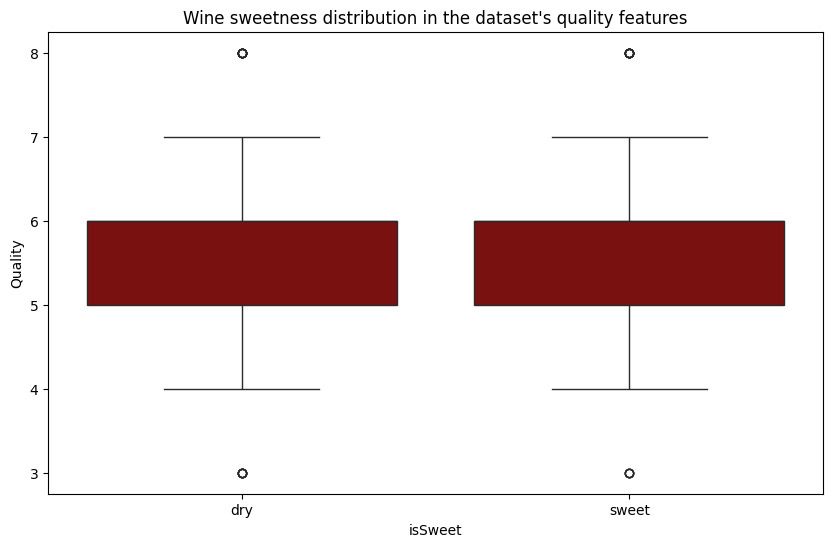

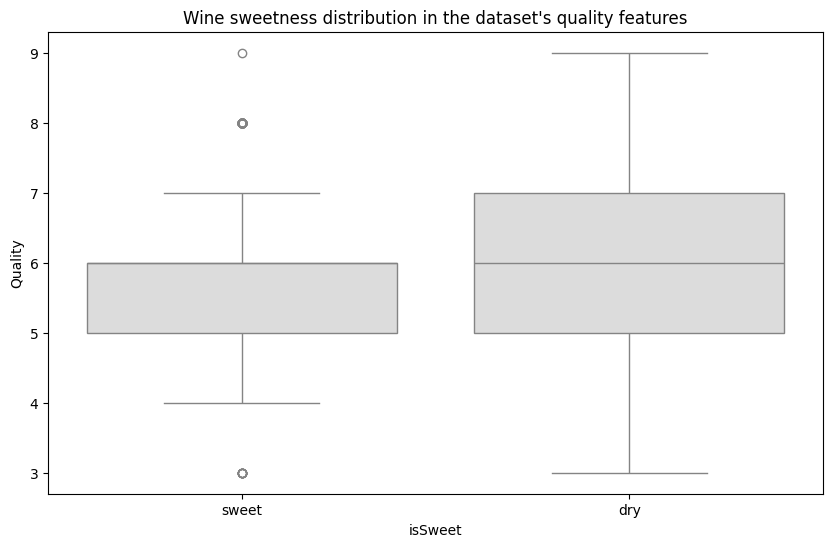

In [23]:
# Plotting the distribution of wine sweetness in red wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=red_wine["isSweet"], y=red_wine["quality"], color="darkred")
plt.title("Wine sweetness distribution in the dataset's quality features")
plt.ylabel("Quality")
plt.show()
plt.close()

# Plotting the distribution of wine sweetness in white wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=white_wine["isSweet"], y=white_wine["quality"], color="gainsboro")
plt.title("Wine sweetness distribution in the dataset's quality features")
plt.ylabel("Quality")
plt.show()
plt.close()

The results shows some difference in quality perception between <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wines; specially in comparison to drier <span style="color:gainsboro">**white**</span> wines. 

# Extension 1:

As an extension to this task, I performed some additional descriptive analysis, by illustrating `quality` with respect to `isSweet` and `alcohol_cat` in a `barplot`. This plot demonstrates a more detailed `quality` representation for the sets. For further exploration, I carried out this same analysis on a **combined** set, of both wines. 

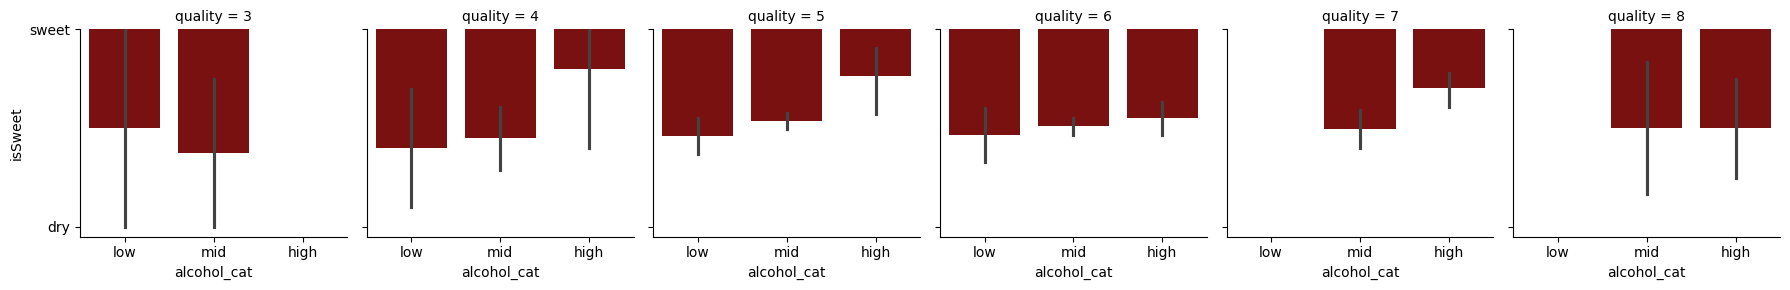

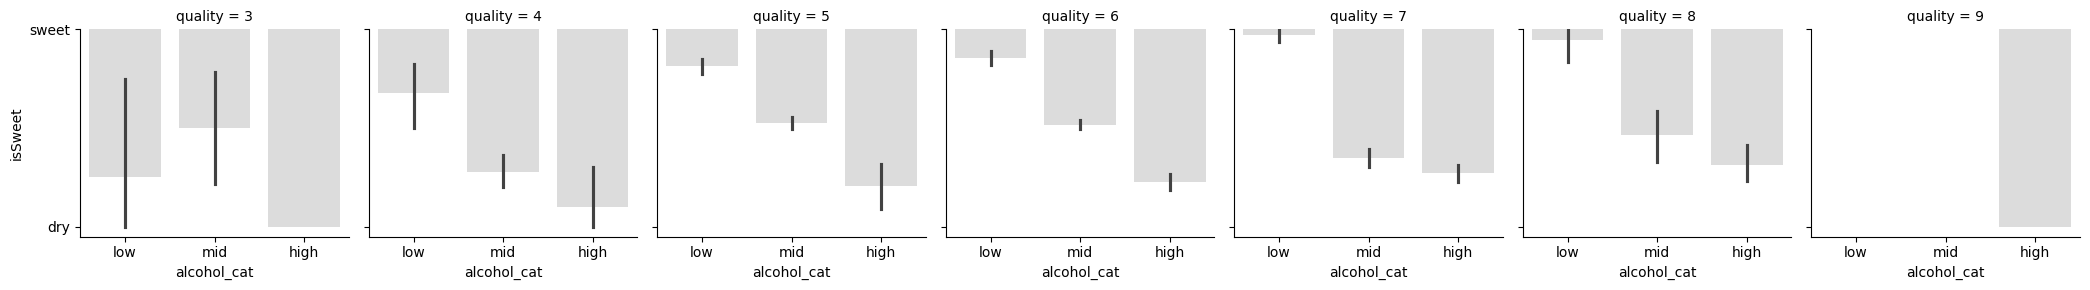

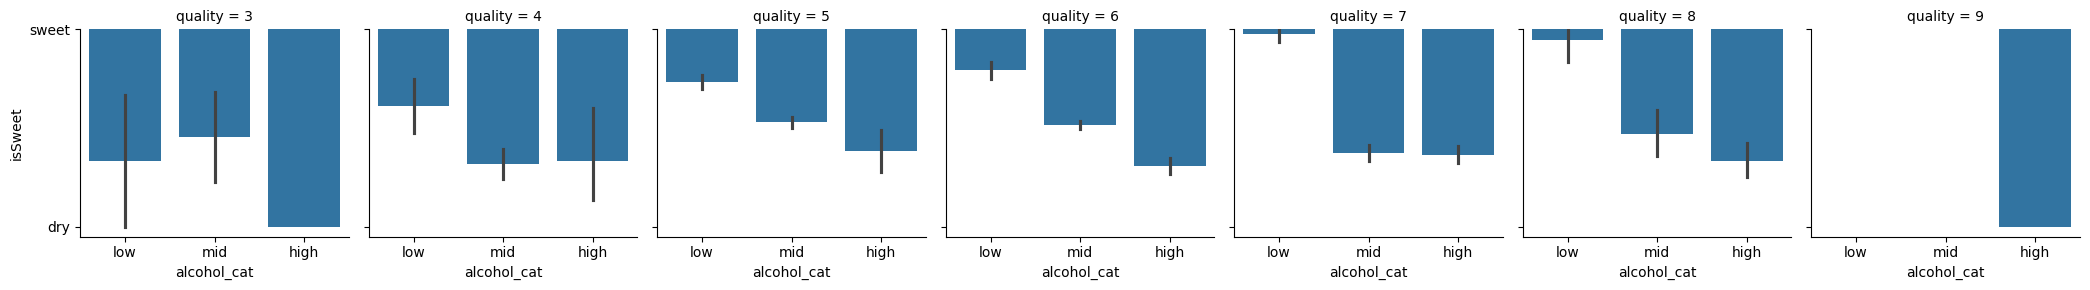

In [24]:
# Add a new column to each dataset to indicate the wine type
red_wine["wine_type"] = 0
white_wine["wine_type"] = 1

# Join the two datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

# Make multiple barplots for red wine
grid = sns.FacetGrid(red_wine, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"], color="darkred")

# Make multiple barplots for white wine
grid = sns.FacetGrid(white_wine, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"], color="gainsboro")

# Make multiple barplots for both wines
grid = sns.FacetGrid(wine_data, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"])

The graphs show that high-quality(7-8) <span style="color:darkred">**red**</span> wines are mainly sweet and contain a `high` amount of alcohol. While high-quality <span style="color:gainsboro">**white**</span> wines have a higher amount of alcohol, but with a wider range in between `sweet` and `dry`, however, mainly hovering around `sweet`.

As for the combined set, since the amount of <span style="color:gainsboro">**white**</span> wine samples is much higher than the <span style="color:darkred">**red**</span> samples, the results are very similar to the <span style="color:gainsboro">**white**</span> wine set, with a slight but greater concentration in sweeter than dry samples. 

<br>

# Task 2




For this task I identified the most useful variables for learning, by analyzing pairs, and their correlations to `quality`. To visualize this, I will also plot a Correlation Matrix using `pandas`and `seaborn`.

🔴Red Wine's Feature Correlations🔴:
🔴Red Wine's fixed acidity Correlation with Quality🔴:
0.1240516491132243
🔴Red Wine's volatile acidity Correlation with Quality🔴:
-0.39055778026400734
🔴Red Wine's citric acid Correlation with Quality🔴:
0.22637251431804142
🔴Red Wine's residual sugar Correlation with Quality🔴:
0.013731637340066277
🔴Red Wine's chlorides Correlation with Quality🔴:
-0.12890655993005273
🔴Red Wine's free sulfur dioxide Correlation with Quality🔴:
-0.05065605724427633
🔴Red Wine's total sulfur dioxide Correlation with Quality🔴:
-0.18510028892653785
🔴Red Wine's density Correlation with Quality🔴:
-0.17491922778334884
🔴Red Wine's pH Correlation with Quality🔴:
-0.05773139120538215
🔴Red Wine's sulphates Correlation with Quality🔴:
0.2513970790692614
🔴Red Wine's alcohol Correlation with Quality🔴:
0.4761663240011362
🔴Red Wine's wine_type Correlation with Quality🔴:
nan


⚪White Wine's Feature Correlation⚪:
⚪White Wine's fixed acidity Correlation with Quality⚪:
-0.11366283071301796
⚪White 

C:\Users\dario\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\dario\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


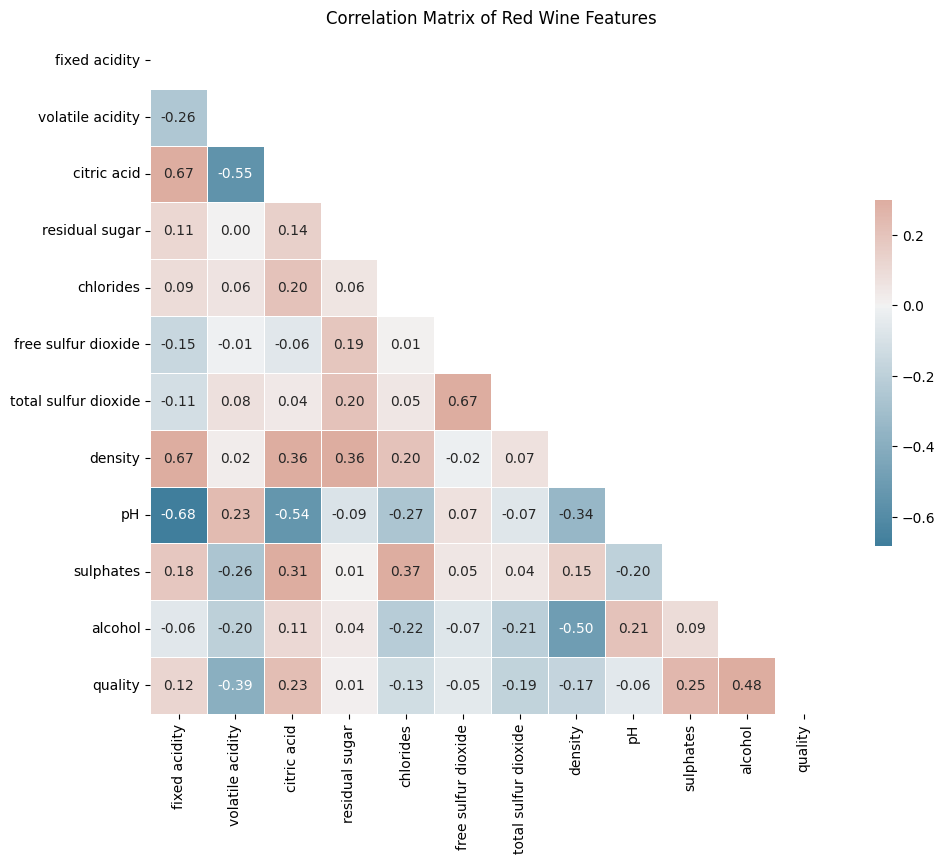

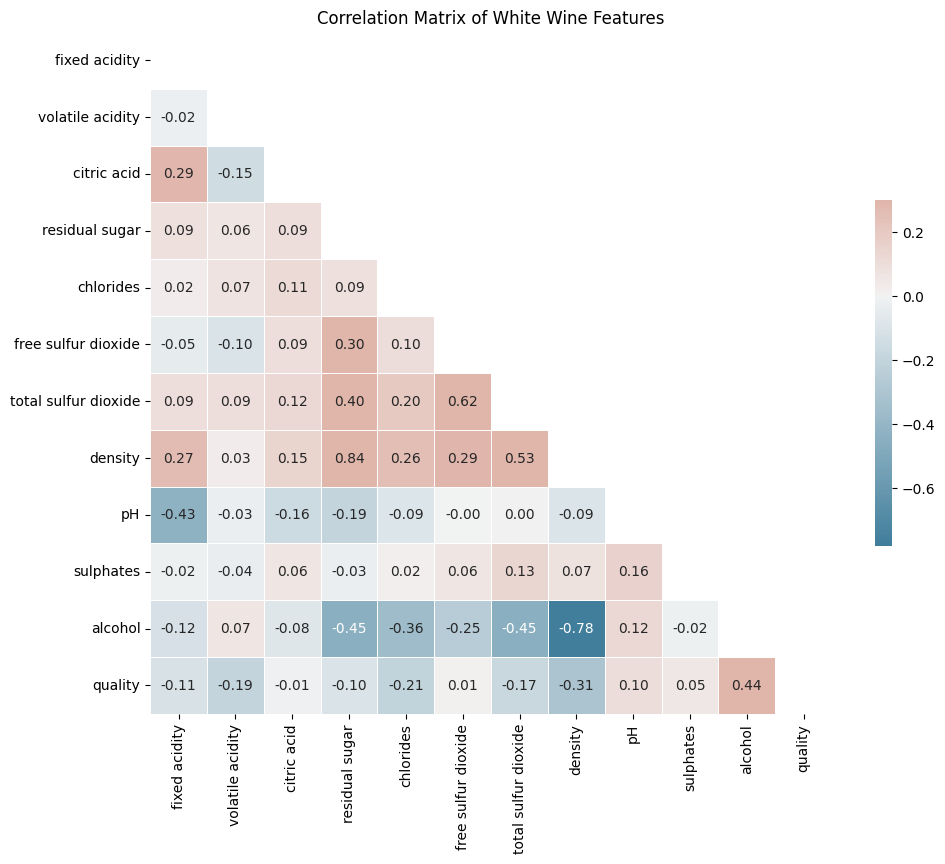

In [25]:
print("🔴Red Wine's Feature Correlations🔴:")

# Correlation of features with quality in red wine dataset as text
for i in red_wine.columns:
    if i != "quality" and i != "alcohol_cat" and i != "isSweet":
        print(f"🔴Red Wine's {i} Correlation with Quality🔴:")
        print(red_wine[str(i)].corr(red_wine["quality"], method='pearson')) 

print(f"\n\n⚪White Wine's Feature Correlation⚪:")
# Correlation of features with quality in white wine dataset as text
for i in white_wine.columns:
    if i != "quality" and i != "alcohol_cat" and i != "isSweet":
        print(f"⚪White Wine's {i} Correlation with Quality⚪:")
        print(white_wine[str(i)].corr(white_wine["quality"]))
        
# Create subsets of float features for correlation analysis
red_wine_subset = red_wine[["fixed acidity",	"volatile acidity", "citric acid", 
                           "residual sugar", "chlorides", "free sulfur dioxide", 
                           "total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"]]
white_wine_subset = white_wine[["fixed acidity",	"volatile acidity", "citric acid", 
                           "residual sugar", "chlorides", "free sulfur dioxide", 
                           "total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"]]

# Calculate the correlation matrix for the red wine subset
red_wine_corr = red_wine_subset.corr()
mask = np.triu(np.ones_like(red_wine_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(red_wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Red Wine Features")
plt.show()


# Calculate the correlation matrix for the white wine subset
white_wine_corr = white_wine_subset.corr()
plt.figure(figsize=(11, 9))
mask = np.triu(np.ones_like(white_wine_corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(white_wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of White Wine Features")
plt.show()

The following features show the highest correlations, whether positive or negative:

🔴Red Wine features🔴: 
•	Alcohol (0.48)
•	Volatile Acidity (-0.39)
•	Citric Acid (0.23)
•	Sulphates (0.25)

⚪White Wine features⚪:
•	Alcohol (0.44)
•	Volatile Acidity (-0.19)
•	Chlorides (-0.21)
•	Density (-0.31)

# Task 3

For this task, I created a machine learning model to predict `quality` from the features gathered in **Task 2**.

The learning approach for this task will be **regression**, instead of **classification**, which means `quality` will be considered a continuous variable, instead of being altered to introduce classification and thresholds. 

To solve this **regression problem** I have trained the model separately for each wine set.

🔴 Red Wine set 🔴:

In [26]:
# Create red wine set with specific features based on the correlation analysis
red_wine_subset = red_wine[["citric acid", "sulphates", "volatile acidity","alcohol", "quality"]]

# Define the red wine features and target variable
red_data = red_wine_subset.drop(columns=["quality"])
red_labels = red_wine_subset["quality"]

# Split the dataset into training and testing sets
red_data_train, red_data_test, red_labels_train, red_labels_test = train_test_split(red_data, red_labels, test_size=0.2, random_state=42)

# Scale the train and test data
scaler = StandardScaler()

# Fit and transform train and test data
red_data_train_scaled = scaler.fit_transform(red_data_train)
red_data_test_scaled = scaler.transform(red_data_test)

⚪ White Wine set ⚪:

In [27]:
# Create white wine set with specific features based on the correlation analysis
white_wine_subset = white_wine[["density", "chlorides", "volatile acidity", "alcohol", "quality"]]

# Define the red wine features and target variable
white_data = white_wine_subset.drop(columns=["quality"])
white_labels = white_wine_subset["quality"]

# Split the dataset into training and testing sets
white_data_train, white_data_test, white_labels_train, white_labels_test = train_test_split(white_data, white_labels, test_size=0.2, random_state=42)

# Fit and transform train and test data
white_data_train_scaled = scaler.fit_transform(white_data_train)
white_data_test_scaled = scaler.transform(white_data_test)


To find the best parameters I used a `RandomForestRegressor` model, which will be helpful in terms of accuracy and stability due to the multiple decision trees used to predict. I also performed a **grid search** with **k-folds**(5) to provide the best parameters for the model to learn and predict as accurately as possible.

In [28]:
# Initialize Random Forest for regression problem
random_forest = RandomForestRegressor(n_estimators=100, random_state=42) 

parameters_to_tune = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Define the K-Fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with parameter and k-folds
grid_search = GridSearchCV(estimator=random_forest,
                           param_grid=parameters_to_tune,
                           cv=kf,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

# Fit the model with the red wine training data
grid_search.fit(red_data_train_scaled, red_labels_train)
red_best_parameters = grid_search.best_params_

print(f"Best parameters for 🔴red wine🔴 found: {red_best_parameters}")

# Fit the model with the red wine training data
grid_search.fit(white_data_train_scaled, white_labels_train)
white_best_parameters = grid_search.best_params_

print(f"\nBest parameters for ⚪white wine⚪ found: {white_best_parameters}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for 🔴red wine🔴 found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best parameters for ⚪white wine⚪ found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Now that we have the best possible parameters, let's fit the random forest with these and test the model by calculating its **Mean Squared Error(MSE)** and **r<sup> 2</sup>(Coefficient of Determination)**.

<br>

# Extension 2 

The features have already been chosen in **Task 2**, but must follow these rules:

1. Two variables shouldn't be highly correlated with each other.

2. Variables must have a high correlation with outcome.

3. Using variables that have very small variance across the training set is not useful.

<br>

The picked features show signs of high correlation with each other, but also show a high correlation with target value with high variance on the training set.

1. The following pairs show high numbers in correlation with each other:
    * 🔴Red Wine🔴:
        * Volatile Acidity and Citric Acid (-0.55)
    
    * ⚪White Wine⚪:
        * Alcohol and Density (-0.78)



## Volatile Acidity & Citric Acid in Red Wine

In [29]:
# Model 1: Using only 'Volatile Acidity' 
red_wine_subset_volatile = red_wine[["sulphates", "volatile acidity", "alcohol", "quality"]]

red_data_volatile = red_wine_subset_volatile.drop(columns=["quality"])
red_labels_volatile = red_wine_subset_volatile["quality"]
red_data_train_volatile, red_data_test_volatile, red_labels_train_volatile, red_labels_test_volatile = train_test_split(red_data_volatile, red_labels_volatile, test_size=0.2, random_state=42)
red_scaler_volatile = StandardScaler()
red_data_train_scaled_volatile = red_scaler_volatile.fit_transform(red_data_train_volatile)
red_data_test_scaled_volatile = red_scaler_volatile.transform(red_data_test_volatile)

# Initialize Random Forest for best parameters
best_params = grid_search.best_params_
random_forest_volatile = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_volatile.fit(red_data_train_scaled_volatile, red_labels_train_volatile)
labels_pred_volatile = random_forest_volatile.predict(red_data_test_scaled_volatile)
mse_volatile = mean_squared_error(red_labels_test_volatile, labels_pred_volatile)
r2_volatile = r2_score(red_labels_test_volatile, labels_pred_volatile)

print("\nModel using only 'volatile acidity'")
print(f"Test Set Mean Squared Error (volatile acidity): {mse_volatile}")
print(f"Test Set R-squared (volatile acidity): {r2_volatile}")


Model using only 'volatile acidity'
Test Set Mean Squared Error (volatile acidity): 0.3692100355986259
Test Set R-squared (volatile acidity): 0.43503178999537817


In [30]:
# Model 2: Using only 'Citric Acid'
red_wine_subset_citric = red_wine[["sulphates", "citric acid", "alcohol", "quality"]]

red_data_citric = red_wine_subset_citric.drop(columns=["quality"])
red_labels_citric = red_wine_subset_citric["quality"]
red_data_train_citric, red_data_test_citric, red_labels_train_citric, red_labels_test_citric = train_test_split(red_data_citric, red_labels_citric, test_size=0.2, random_state=42)
red_scaler_citric = StandardScaler()
red_data_train_scaled_citric = red_scaler_citric.fit_transform(red_data_train_citric)
red_data_test_scaled_citric = red_scaler_citric.transform(red_data_test_citric)

# Initialize Random Forest for best parameters
best_params = grid_search.best_params_
random_forest_citric = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_citric.fit(red_data_train_scaled_citric, red_labels_train_citric)
labels_pred_citric = random_forest_citric.predict(red_data_test_scaled_citric)
mse_citric = mean_squared_error(red_labels_test_citric, labels_pred_citric)
r2_citric = r2_score(red_labels_test_citric, labels_pred_citric)

print("\nModel using only 'citric acid'")
print(f"Test Set Mean Squared Error (citric acid): {mse_citric}")
print(f"Test Set R-squared (citric acid): {r2_citric}")


Model using only 'citric acid'
Test Set Mean Squared Error (citric acid): 0.40153848561675254
Test Set R-squared (citric acid): 0.38556253190939116


As seen, from the pair `volatile acidity` on its own, shows a better performance than a training set with only `citric acid`. The pair also shows a high variance although not significant in MSE and r<sup> 2</sup> scores.

## Alcohol & Density in White Wine

In [31]:
# Model 1: Using only 'Alcohol' 
white_wine_subset_alcohol = white_wine[["chlorides", "volatile acidity", "alcohol", "quality"]]

white_data_alcohol = white_wine_subset_alcohol.drop(columns=["quality"])
white_labels_alcohol = white_wine_subset_alcohol["quality"]
white_data_train_alcohol, white_data_test_alcohol, white_labels_train_alcohol, white_labels_test_alcohol = train_test_split(white_data_alcohol, white_labels_alcohol, test_size=0.2, random_state=42)
white_scaler_alcohol = StandardScaler()
white_data_train_scaled_alcohol = white_scaler_alcohol.fit_transform(white_data_train_alcohol)
white_data_test_scaled_alcohol = white_scaler_alcohol.transform(white_data_test_alcohol)

# Initialize Random Forest for best parameters
best_params = grid_search.best_params_
random_forest_alcohol = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_alcohol.fit(white_data_train_scaled_alcohol, white_labels_train_alcohol)
labels_pred_alcohol = random_forest_alcohol.predict(white_data_test_scaled_alcohol)
mse_alcohol = mean_squared_error(white_labels_test_alcohol, labels_pred_alcohol)
r2_alcohol = r2_score(white_labels_test_alcohol, labels_pred_alcohol)

print("\nModel using only 'alcohol'")
print(f"Test Set Mean Squared Error (alcohol): {mse_alcohol}")
print(f"Test Set R-squared (alcohol): {r2_alcohol}")


Model using only 'alcohol'
Test Set Mean Squared Error (alcohol): 0.46900190580070256
Test Set R-squared (alcohol): 0.3944245657041442


In [32]:
# Model 2: Using only 'density'
white_wine_subset_density = white_wine[["chlorides", "volatile acidity", "density", "quality"]]

white_data_density = white_wine_subset_density.drop(columns=["quality"])
white_labels_density = white_wine_subset_density["quality"]
white_data_train_density, white_data_test_density, white_labels_train_density, white_labels_test_density = train_test_split(white_data_density, white_labels_density, test_size=0.2, random_state=42)
white_scaler_density = StandardScaler()
white_data_train_scaled_density = white_scaler_density.fit_transform(white_data_train_density)
white_data_test_scaled_density = white_scaler_density.transform(white_data_test_density)

# Initialize Random Forest for best parameters
best_params = grid_search.best_params_
random_forest_density = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_density.fit(white_data_train_scaled_density, white_labels_train_density)
labels_pred_density = random_forest_density.predict(white_data_test_scaled_density)
mse_density = mean_squared_error(white_labels_test_density, labels_pred_density)
r2_density = r2_score(white_labels_test_density, labels_pred_density)

print("\nModel using only 'density'")
print(f"Test Set Mean Squared Error (density): {mse_density}")
print(f"Test Set R-squared (density): {r2_density}")


Model using only 'density'
Test Set Mean Squared Error (density): 0.4766493514421201
Test Set R-squared (density): 0.38455018106246786


The results show a smaller variance in results in comparison to the previous pair. This means that having this pair is not very useful for learning. 

We could argue that the variable that should be excluded from the subset, should be `density` since `alcohol` is the variable with most correlation to quality, which means it should not be excluded from the training set at all. 

However, due to the low number of highly correlated features in white wine, I think it's acceptable to keep `density` within the subset, to leverage as many positive results as possible. In the future however, this feature should be removed from this set.   

<br>

The results shown also contribute to **Task 4** since now I have a deeper understanding of the variables and their impact, which is useful when including more samples and features to the sets.

<br>

# Task 4
In order to evaluate the regression model with our new subset of features, I used **K-Fold Cross Validation** to calculate in 5 different folds, the **MSE** and **r<sup> 2</sup>** on the model's performance:

In [33]:
# Create red wine set with specific features based on the correlation analysis
red_wine_subset = red_wine[["citric acid", "sulphates", "volatile acidity", "alcohol", "quality"]]

# Define the red wine features and target variable
red_data = red_wine_subset.drop(columns=["quality"])
red_labels = red_wine_subset["quality"]

# Split the dataset into training and testing sets
red_data_train, red_data_test, red_labels_train, red_labels_test = train_test_split(red_data, red_labels, test_size=0.2, random_state=42)

# Fit and transform train and test data
red_data_train_scaled = scaler.fit_transform(red_data_train)
red_data_test_scaled = scaler.transform(red_data_test)

In [34]:
# Create white wine set with specific features based on the correlation analysis
white_wine_subset = white_wine[["density", "chlorides", "volatile acidity", "alcohol", "quality"]]

# Define the red wine features and target variable
white_data = white_wine_subset.drop(columns=["quality"])
white_labels = white_wine_subset["quality"]

# Split the dataset into training and testing sets
white_data_train, white_data_test, white_labels_train, white_labels_test = train_test_split(white_data, white_labels, test_size=0.2, random_state=42)

# Fit and transform train and test data
white_data_train_scaled = scaler.fit_transform(white_data_train)
white_data_test_scaled = scaler.transform(white_data_test)

In [35]:
# Initialize Random Forest for Task 4
best_params = grid_search.best_params_
random_forest = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

# Perform cross-validation and get the MSE scores
neg_mse_scores = cross_val_score(random_forest, red_data_train_scaled, red_labels_train, cv=kf, scoring='neg_mean_squared_error')
red_mse_scores = -neg_mse_scores 

# Perform cross-validation and get the R-squared scores
red_r2_scores = cross_val_score(random_forest, red_data_train_scaled, red_labels_train, cv=kf, scoring='r2')


# Display testing set results for Red wine
print("🔴Red Wine Set Results🔴:")
print("\nK-Fold Cross-Validation on Training Set:")
print(f"MSE:{red_mse_scores}")
print(f"R-squared: {red_r2_scores}\n")

print(f"MSE Scores Mean: {red_mse_scores.mean()}")
print(f"r2 Scores Mean: {red_r2_scores.mean()}")

# Perform cross-validation and get the MSE scores
neg_mse_scores = cross_val_score(random_forest, red_data_test_scaled, red_labels_test, cv=kf, scoring='neg_mean_squared_error')
red_mse_scores = -neg_mse_scores 

# Perform cross-validation and get the R-squared scores
red_r2_scores = cross_val_score(random_forest, red_data_test_scaled, red_labels_test, cv=kf, scoring='r2')

# Display testing set results for White wine
print("\nK-Fold Cross-Validation on Test Set: ")
print(f"MSE:{red_mse_scores}")
print(f"R-squared: {red_r2_scores}\n")

print(f"MSE Scores Mean: {red_mse_scores.mean()}")
print(f"r2 Scores Mean: {red_r2_scores.mean()}")

🔴Red Wine Set Results🔴:

K-Fold Cross-Validation on Training Set:
MSE:[0.33804033 0.35876617 0.42396926 0.38310226 0.40119059]
R-squared: [0.41266176 0.44219354 0.37722179 0.43451453 0.39562093]

MSE Scores Mean: 0.3810137228825189
r2 Scores Mean: 0.4124425110737505

K-Fold Cross-Validation on Test Set: 
MSE:[0.53940898 0.34165078 0.41881992 0.41648242 0.39711914]
R-squared: [0.28613273 0.4236402  0.25022448 0.38347958 0.36634203]

MSE Scores Mean: 0.42269625
r2 Scores Mean: 0.341963803540722


In [36]:
# Perform cross-validation and get the MSE scores
neg_mse_scores = cross_val_score(random_forest, white_data_train_scaled, white_labels_train, cv=kf, scoring='neg_mean_squared_error')
white_mse_scores = -neg_mse_scores 

# Perform cross-validation and get the R-squared scores
white_r2_scores = cross_val_score(random_forest, white_data_train_scaled, white_labels_train, cv=kf, scoring='r2')


# Display testing set results for Red wine
print("⚪White Wine Set Results⚪:")
print("\nK-Fold Cross-Validation on Training Set:")
print(f"MSE:{white_mse_scores}")
print(f"R-squared: {white_r2_scores}\n")

print(f"MSE Scores Mean: {white_mse_scores.mean()}")
print(f"r2 Scores Mean: {white_r2_scores.mean()}")

# Perform cross-validation and get the MSE scores
neg_mse_scores = cross_val_score(random_forest, white_data_test_scaled, white_labels_test, cv=kf, scoring='neg_mean_squared_error')
white_mse_scores = -neg_mse_scores 

# Perform cross-validation and get the R-squared scores
white_r2_scores = cross_val_score(random_forest, white_data_test_scaled, white_labels_test, cv=kf, scoring='r2')

# Display testing set results for White wine
print("\nK-Fold Cross-Validation on Test Set:")
print(f"MSE:{white_mse_scores}")
print(f"R-squared: {white_r2_scores}\n")

print(f"MSE Scores Mean: {white_mse_scores.mean()}")
print(f"r2 Scores Mean: {white_r2_scores.mean()}")

⚪White Wine Set Results⚪:

K-Fold Cross-Validation on Training Set:
MSE:[0.41298903 0.45801467 0.47422677 0.52027624 0.53005745]
R-squared: [0.4659153  0.38027859 0.37595921 0.37180089 0.35535164]

MSE Scores Mean: 0.4791128308142353
r2 Scores Mean: 0.38986112889968344

K-Fold Cross-Validation on Test Set:
MSE:[0.49715427 0.6427361  0.56770344 0.54553198 0.68225359]
R-squared: [0.31131262 0.24684755 0.11183485 0.28697753 0.23064978]

MSE Scores Mean: 0.5870758742017215
r2 Scores Mean: 0.23752446649282577
